In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, CuDNNLSTM, Dropout, Flatten
from keras.optimizers import Adam
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import config_LSTM as cfg
from labor_katharina import labels, LSTM_funcs
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold
import seaborn as sns
from sklearn.metrics import classification_report, make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_curve, plot_confusion_matrix, confusion_matrix
from datetime import datetime
import pickle
import os
import shutil
from sklearn.utils import class_weight, shuffle
import random
from imblearn.under_sampling import RandomUnderSampler

Using TensorFlow backend.


In [2]:
#importing the data
features_orig = pd.read_pickle(cfg.features['path'])
features_orig = features_orig.sort_index()
features_orig = features_orig.reset_index()
features_orig = features_orig.drop(columns=['index'])

if cfg.time_dimension['binning'] == True:
    users = pd.read_pickle(cfg.time_dimension['add_info'])
    X, label = LSTM_funcs.bin_features(features_orig, users, cfg.time_dimension['bin_size'], cfg.features['names'])
else:
    if cfg.time_dimension['version'] == 1:
        X, label = LSTM_funcs.rearrange_features1(features_orig, cfg.features['names'], cfg.time_dimension['length'])
    elif cfg.time_dimension['version'] == 2:
        X, label = LSTM_funcs.rearrange_features2(features_orig, cfg.features['names'], cfg.time_dimension['length'])
    elif cfg.time_dimension['version'] == 3:
        X, label = LSTM_funcs.rearrange_features3(features_orig, cfg.features['names'], cfg.time_dimension['length'], cfg.time_dimension['synthesize'])

#using already arranged data
#features = np.load('./data/features/train/TTD/2020-01-22_17-08-28/LSTM/features.npy')
#label = np.load('./data/features/train/TTD/2020-01-22_17-08-28/LSTM/label.npy')

print('Dimensions of feature vector:', X.shape)
print('Shape of label vector:', label.shape)

Processing user 0 / 1243
Processing user 1 / 1243
Processing user 2 / 1243
Processing user 3 / 1243
Processing user 4 / 1243
Processing user 5 / 1243
Processing user 6 / 1243
Processing user 7 / 1243
Processing user 8 / 1243
Processing user 9 / 1243
Processing user 10 / 1243
Processing user 11 / 1243
Processing user 12 / 1243
Processing user 13 / 1243
Processing user 14 / 1243
Processing user 15 / 1243
Processing user 16 / 1243
Processing user 17 / 1243
Processing user 18 / 1243
Processing user 19 / 1243
Processing user 20 / 1243
Processing user 21 / 1243
Processing user 22 / 1243
Processing user 23 / 1243
Processing user 24 / 1243
Processing user 25 / 1243
Processing user 26 / 1243
Processing user 27 / 1243
Processing user 28 / 1243
Processing user 29 / 1243
Processing user 30 / 1243
Processing user 31 / 1243
Processing user 32 / 1243
Processing user 33 / 1243
Processing user 34 / 1243
Processing user 35 / 1243
Processing user 36 / 1243
Processing user 37 / 1243
Processing user 38 / 1

Processing user 308 / 1243
Processing user 309 / 1243
Processing user 310 / 1243
Processing user 311 / 1243
Processing user 312 / 1243
Processing user 313 / 1243
Processing user 314 / 1243
Processing user 315 / 1243
Processing user 316 / 1243
Processing user 317 / 1243
Processing user 318 / 1243
Processing user 319 / 1243
Processing user 320 / 1243
Processing user 321 / 1243
Processing user 322 / 1243
Processing user 323 / 1243
Processing user 324 / 1243
Processing user 325 / 1243
Processing user 326 / 1243
Processing user 327 / 1243
Processing user 328 / 1243
Processing user 329 / 1243
Processing user 330 / 1243
Processing user 331 / 1243
Processing user 332 / 1243
Processing user 333 / 1243
Processing user 334 / 1243
Processing user 335 / 1243
Processing user 336 / 1243
Processing user 337 / 1243
Processing user 338 / 1243
Processing user 339 / 1243
Processing user 340 / 1243
Processing user 341 / 1243
Processing user 342 / 1243
Processing user 343 / 1243
Processing user 344 / 1243
P

Processing user 615 / 1243
Processing user 616 / 1243
Processing user 617 / 1243
Processing user 618 / 1243
Processing user 619 / 1243
Processing user 620 / 1243
Processing user 621 / 1243
Processing user 622 / 1243
Processing user 623 / 1243
Processing user 624 / 1243
Processing user 625 / 1243
Processing user 626 / 1243
Processing user 627 / 1243
Processing user 628 / 1243
Processing user 629 / 1243
Processing user 630 / 1243
Processing user 631 / 1243
Processing user 632 / 1243
Processing user 633 / 1243
Processing user 634 / 1243
Processing user 635 / 1243
Processing user 636 / 1243
Processing user 637 / 1243
Processing user 638 / 1243
Processing user 639 / 1243
Processing user 640 / 1243
Processing user 641 / 1243
Processing user 642 / 1243
Processing user 643 / 1243
Processing user 644 / 1243
Processing user 645 / 1243
Processing user 646 / 1243
Processing user 647 / 1243
Processing user 648 / 1243
Processing user 649 / 1243
Processing user 650 / 1243
Processing user 651 / 1243
P

Processing user 921 / 1243
Processing user 922 / 1243
Processing user 923 / 1243
Processing user 924 / 1243
Processing user 925 / 1243
Processing user 926 / 1243
Processing user 927 / 1243
Processing user 928 / 1243
Processing user 929 / 1243
Processing user 930 / 1243
Processing user 931 / 1243
Processing user 932 / 1243
Processing user 933 / 1243
Processing user 934 / 1243
Processing user 935 / 1243
Processing user 936 / 1243
Processing user 937 / 1243
Processing user 938 / 1243
Processing user 939 / 1243
Processing user 940 / 1243
Processing user 941 / 1243
Processing user 942 / 1243
Processing user 943 / 1243
Processing user 944 / 1243
Processing user 945 / 1243
Processing user 946 / 1243
Processing user 947 / 1243
Processing user 948 / 1243
Processing user 949 / 1243
Processing user 950 / 1243
Processing user 951 / 1243
Processing user 952 / 1243
Processing user 953 / 1243
Processing user 954 / 1243
Processing user 955 / 1243
Processing user 956 / 1243
Processing user 957 / 1243
P

Processing user 1217 / 1243
Processing user 1218 / 1243
Processing user 1219 / 1243
Processing user 1220 / 1243
Processing user 1221 / 1243
Processing user 1222 / 1243
Processing user 1223 / 1243
Processing user 1224 / 1243
Processing user 1225 / 1243
Processing user 1226 / 1243
Processing user 1227 / 1243
Processing user 1228 / 1243
Processing user 1229 / 1243
Processing user 1230 / 1243
Processing user 1231 / 1243
Processing user 1232 / 1243
Processing user 1233 / 1243
Processing user 1234 / 1243
Processing user 1235 / 1243
Processing user 1236 / 1243
Processing user 1237 / 1243
Processing user 1238 / 1243
Processing user 1239 / 1243
Processing user 1240 / 1243
Processing user 1241 / 1243
Processing user 1242 / 1243
Processing user 1243 / 1243
Dimensions of feature vector: (1244, 50, 14)
Shape of label vector: (1244,)


In [3]:
#compute labels
y = labels.TTD_create_LSTM(label, cfg.label['num_classes'])


#print degree of unbalancing
[print('Class',c,':', len([i for i in y if i == c])/len(y)) for c in range(cfg.label['num_classes'])]

Class 0 : 0.29260450160771706
Class 1 : 0.707395498392283


[None, None]

In [4]:
report = []
conf_matrix = np.zeros((cfg.label['num_classes'],cfg.label['num_classes']))
hist = []

if cfg.validation['type'] == 'KFold':
    kf = KFold(cfg.validation['splits'])
elif cfg.validation['type'] == 'SKFold':
    kf = StratifiedKFold(cfg.validation['splits'])


for train_index, test_index in kf.split(X,y):
    X_train, y_train = X[train_index,:,:], y[train_index]
    X_test, y_test = X[test_index,:,:], y[test_index]
    
    
    
    #normalizing data
    scaler = MinMaxScaler()
    X_shape_3d = X_train.shape
    X_shape_2d = (X_shape_3d[0]*X_shape_3d[1], X_shape_3d[2])
    X_train = np.reshape(X_train, X_shape_2d)
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_train = np.reshape(X_train, X_shape_3d)
    X_shape_3d = X_test.shape
    X_shape_2d = (X_shape_3d[0]*X_shape_3d[1], X_shape_3d[2])
    X_test = np.reshape(X_test, X_shape_2d)
    X_test = scaler.transform(X_test)
    X_test = np.reshape(X_test, X_shape_3d)


    
    #Initializing the classifier Network
    classifier = Sequential()

    #Adding the input LSTM network layer
    classifier.add(LSTM(64, input_shape=(X_train.shape[1:])))#, return_sequences=True))
    #classifier.add(Flatten())
    #classifier.add(Dense(256, activation = 'relu'))
    #classifier.add(Dropout(0.3))
    #classifier.add(LSTM(64))
    #classifier.add(Dropout(0.5))

    #Adding the output layer
    classifier.add(Dense(cfg.label['num_classes'], activation='softmax'))

    #Compiling the network
    #classifier.compile(loss='sparse_categorical_crossentropy',
                  #optimizer=Adam(lr=0.001, decay=1e-6),
                 # metrics=['accuracy'] )
    classifier.compile(loss='sparse_categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'] )
    
    
    #compute class weights
    #class_weights = {i:len(y_train)/(cfg.label['num_classes']*np.bincount(y_train)[i]) for i in range(cfg.label['num_classes'])}
    class_weights = {i:cfg.label['num_classes']*len(y_train)/np.bincount(y_train)[i]  for i in range(cfg.label['num_classes'])}
    
#    X_train = np.expand_dims(X_train[0],0)
#    y_train = np.expand_dims(y_train[0],0)
#    y_test = np.expand_dims(y_test[0],0)
#    X_test = np.expand_dims(X_test[0],0)
    
#    X_train = X_train[0:50]
#    y_train = y_train[0:50]
#    y_test = y_test[0:50]
#    X_test = X_test[0:50]
#    
#    print('y_test:', y_test)
#    print('y_train:', y_train)
    
#    #Fitting the data to the model
    history = classifier.fit(X_train, y_train, epochs=cfg.params['epochs'],  validation_split=0.2, class_weight=class_weights,max_queue_size=1,
                            batch_size=cfg.params['batch_size'])
    #history = classifier.fit(X_train, y_train, epochs=cfg.params['epochs'], validation_split=0.5, 
     #                       batch_size=cfg.params['batch_size'])
       
    #
        
    hist.append(history.history)
    
    y_predict_prob = classifier.predict(X_test)
    y_predict = y_predict_prob.argmax(axis=-1)
    test_loss, test_acc = classifier.evaluate(X_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))
    
    report.append(classification_report(y_test, y_predict, output_dict=True))
    conf_matrix = np.add(conf_matrix, confusion_matrix(y_test, y_predict, normalize='true'))

Train on 796 samples, validate on 199 samples
Epoch 1/500
796/796 [==============================] - 1s 1ms/step - loss: 2.8010 - accuracy: 0.4912 - val_loss: 2.7522 - val_accuracy: 0.2864
Epoch 2/500
796/796 [==============================] - 1s 713us/step - loss: 2.7324 - accuracy: 0.4058 - val_loss: 2.7052 - val_accuracy: 0.6231
Epoch 3/500
796/796 [==============================] - 1s 728us/step - loss: 2.6896 - accuracy: 0.5754 - val_loss: 2.6712 - val_accuracy: 0.5829
Epoch 4/500
796/796 [==============================] - 1s 726us/step - loss: 2.6539 - accuracy: 0.6068 - val_loss: 2.6518 - val_accuracy: 0.5477
Epoch 5/500
796/796 [==============================] - 1s 739us/step - loss: 2.6152 - accuracy: 0.6206 - val_loss: 2.6346 - val_accuracy: 0.5729
Epoch 6/500
796/796 [==============================] - 1s 687us/step - loss: 2.5891 - accuracy: 0.6231 - val_loss: 2.6193 - val_accuracy: 0.5879
Epoch 7/500
796/796 [==============================] - 1s 659us/step - loss: 2.5685 - 

Epoch 57/500
796/796 [==============================] - 0s 562us/step - loss: 2.4364 - accuracy: 0.6382 - val_loss: 2.4703 - val_accuracy: 0.7035
Epoch 58/500
796/796 [==============================] - 0s 589us/step - loss: 2.4559 - accuracy: 0.6520 - val_loss: 2.4558 - val_accuracy: 0.6231
Epoch 59/500
796/796 [==============================] - 0s 589us/step - loss: 2.4275 - accuracy: 0.6646 - val_loss: 2.4519 - val_accuracy: 0.6131
Epoch 60/500
796/796 [==============================] - 0s 582us/step - loss: 2.4351 - accuracy: 0.6445 - val_loss: 2.4392 - val_accuracy: 0.6382
Epoch 61/500
796/796 [==============================] - 0s 569us/step - loss: 2.4283 - accuracy: 0.6608 - val_loss: 2.4399 - val_accuracy: 0.6683
Epoch 62/500
796/796 [==============================] - 0s 589us/step - loss: 2.4438 - accuracy: 0.6545 - val_loss: 2.4325 - val_accuracy: 0.6432
Epoch 63/500
796/796 [==============================] - 0s 582us/step - loss: 2.4278 - accuracy: 0.6457 - val_loss: 2.4352 -

796/796 [==============================] - 1s 651us/step - loss: 2.3243 - accuracy: 0.7010 - val_loss: 2.3325 - val_accuracy: 0.6382
Epoch 114/500
796/796 [==============================] - 1s 648us/step - loss: 2.3336 - accuracy: 0.6784 - val_loss: 2.3131 - val_accuracy: 0.7286
Epoch 115/500
796/796 [==============================] - 1s 667us/step - loss: 2.3476 - accuracy: 0.6935 - val_loss: 2.4019 - val_accuracy: 0.7387
Epoch 116/500
796/796 [==============================] - 1s 687us/step - loss: 2.3337 - accuracy: 0.7111 - val_loss: 2.4288 - val_accuracy: 0.5930
Epoch 117/500
796/796 [==============================] - 1s 667us/step - loss: 2.3099 - accuracy: 0.6935 - val_loss: 2.3382 - val_accuracy: 0.6332
Epoch 118/500
796/796 [==============================] - 1s 667us/step - loss: 2.3002 - accuracy: 0.7111 - val_loss: 2.4719 - val_accuracy: 0.5879
Epoch 119/500
796/796 [==============================] - 1s 667us/step - loss: 2.2931 - accuracy: 0.6972 - val_loss: 2.3530 - val_ac

Epoch 169/500
796/796 [==============================] - 1s 706us/step - loss: 2.2147 - accuracy: 0.7161 - val_loss: 2.2254 - val_accuracy: 0.7437
Epoch 170/500
796/796 [==============================] - 1s 711us/step - loss: 2.2911 - accuracy: 0.7123 - val_loss: 2.2328 - val_accuracy: 0.7387
Epoch 171/500
796/796 [==============================] - 1s 688us/step - loss: 2.2547 - accuracy: 0.7098 - val_loss: 2.3323 - val_accuracy: 0.7387
Epoch 172/500
796/796 [==============================] - 1s 708us/step - loss: 2.2540 - accuracy: 0.7412 - val_loss: 2.3276 - val_accuracy: 0.6382
Epoch 173/500
796/796 [==============================] - 1s 706us/step - loss: 2.2085 - accuracy: 0.7224 - val_loss: 2.1823 - val_accuracy: 0.7387
Epoch 174/500
796/796 [==============================] - 1s 706us/step - loss: 2.2402 - accuracy: 0.7173 - val_loss: 2.2830 - val_accuracy: 0.7286
Epoch 175/500
796/796 [==============================] - 1s 726us/step - loss: 2.2362 - accuracy: 0.7249 - val_loss: 2

Epoch 225/500
796/796 [==============================] - 1s 765us/step - loss: 2.1252 - accuracy: 0.7387 - val_loss: 2.1625 - val_accuracy: 0.7387
Epoch 226/500
796/796 [==============================] - 1s 746us/step - loss: 2.1310 - accuracy: 0.7450 - val_loss: 2.4784 - val_accuracy: 0.6231
Epoch 227/500
796/796 [==============================] - 1s 770us/step - loss: 2.2581 - accuracy: 0.7111 - val_loss: 2.4281 - val_accuracy: 0.6181
Epoch 228/500
796/796 [==============================] - 1s 765us/step - loss: 2.1824 - accuracy: 0.7236 - val_loss: 2.1472 - val_accuracy: 0.7538
Epoch 229/500
796/796 [==============================] - 1s 778us/step - loss: 2.1597 - accuracy: 0.7450 - val_loss: 2.1425 - val_accuracy: 0.7387
Epoch 230/500
796/796 [==============================] - 1s 753us/step - loss: 2.1064 - accuracy: 0.7425 - val_loss: 2.2666 - val_accuracy: 0.6985
Epoch 231/500
796/796 [==============================] - 1s 742us/step - loss: 2.1518 - accuracy: 0.7437 - val_loss: 2

Epoch 281/500
796/796 [==============================] - 1s 726us/step - loss: 2.1155 - accuracy: 0.7412 - val_loss: 2.1830 - val_accuracy: 0.7337
Epoch 282/500
796/796 [==============================] - 1s 724us/step - loss: 2.1028 - accuracy: 0.7437 - val_loss: 2.1450 - val_accuracy: 0.7487
Epoch 283/500
796/796 [==============================] - 1s 746us/step - loss: 2.0919 - accuracy: 0.7399 - val_loss: 2.2037 - val_accuracy: 0.7236
Epoch 284/500
796/796 [==============================] - 1s 719us/step - loss: 2.1094 - accuracy: 0.7525 - val_loss: 2.2546 - val_accuracy: 0.7538
Epoch 285/500
796/796 [==============================] - 1s 743us/step - loss: 2.0711 - accuracy: 0.7588 - val_loss: 2.3222 - val_accuracy: 0.7387
Epoch 286/500
796/796 [==============================] - 1s 739us/step - loss: 2.1521 - accuracy: 0.7337 - val_loss: 2.1713 - val_accuracy: 0.7387
Epoch 287/500
796/796 [==============================] - 1s 763us/step - loss: 2.1438 - accuracy: 0.7450 - val_loss: 2

Epoch 337/500
796/796 [==============================] - 1s 765us/step - loss: 2.0881 - accuracy: 0.7437 - val_loss: 2.3287 - val_accuracy: 0.7487
Epoch 338/500
796/796 [==============================] - 1s 739us/step - loss: 2.0815 - accuracy: 0.7500 - val_loss: 2.1813 - val_accuracy: 0.7437
Epoch 339/500
796/796 [==============================] - 1s 779us/step - loss: 2.1188 - accuracy: 0.7374 - val_loss: 2.6893 - val_accuracy: 0.7437
Epoch 340/500
796/796 [==============================] - 1s 767us/step - loss: 2.0891 - accuracy: 0.7550 - val_loss: 2.2232 - val_accuracy: 0.7136
Epoch 341/500
796/796 [==============================] - 1s 785us/step - loss: 2.0245 - accuracy: 0.7513 - val_loss: 2.7330 - val_accuracy: 0.6080
Epoch 342/500
796/796 [==============================] - 1s 753us/step - loss: 2.1119 - accuracy: 0.7475 - val_loss: 2.1480 - val_accuracy: 0.7538
Epoch 343/500
796/796 [==============================] - 1s 724us/step - loss: 2.0380 - accuracy: 0.7563 - val_loss: 2

796/796 [==============================] - 1s 746us/step - loss: 2.0375 - accuracy: 0.7563 - val_loss: 2.2207 - val_accuracy: 0.7337
Epoch 393/500
796/796 [==============================] - 1s 726us/step - loss: 2.0587 - accuracy: 0.7563 - val_loss: 2.3466 - val_accuracy: 0.7588
Epoch 394/500
796/796 [==============================] - 1s 726us/step - loss: 2.0271 - accuracy: 0.7776 - val_loss: 2.1914 - val_accuracy: 0.7136
Epoch 395/500
796/796 [==============================] - 1s 717us/step - loss: 2.0598 - accuracy: 0.7538 - val_loss: 2.2702 - val_accuracy: 0.7035
Epoch 396/500
796/796 [==============================] - 1s 708us/step - loss: 2.0165 - accuracy: 0.7550 - val_loss: 2.2543 - val_accuracy: 0.7286
Epoch 397/500
796/796 [==============================] - 1s 726us/step - loss: 2.0101 - accuracy: 0.7638 - val_loss: 2.2040 - val_accuracy: 0.7286
Epoch 398/500
796/796 [==============================] - 1s 753us/step - loss: 2.0579 - accuracy: 0.7513 - val_loss: 2.4367 - val_ac

Epoch 448/500
796/796 [==============================] - 1s 769us/step - loss: 2.0399 - accuracy: 0.7513 - val_loss: 2.2544 - val_accuracy: 0.7186
Epoch 449/500
796/796 [==============================] - 1s 746us/step - loss: 1.9947 - accuracy: 0.7663 - val_loss: 2.2948 - val_accuracy: 0.7085
Epoch 450/500
796/796 [==============================] - 1s 758us/step - loss: 1.9658 - accuracy: 0.7764 - val_loss: 2.2108 - val_accuracy: 0.7538
Epoch 451/500
796/796 [==============================] - 1s 765us/step - loss: 1.9814 - accuracy: 0.7563 - val_loss: 2.2113 - val_accuracy: 0.7236
Epoch 452/500
796/796 [==============================] - 1s 779us/step - loss: 1.9988 - accuracy: 0.7613 - val_loss: 2.1924 - val_accuracy: 0.7588
Epoch 453/500
796/796 [==============================] - 1s 765us/step - loss: 2.0496 - accuracy: 0.7487 - val_loss: 2.2352 - val_accuracy: 0.7387
Epoch 454/500
796/796 [==============================] - 1s 773us/step - loss: 2.0484 - accuracy: 0.7714 - val_loss: 2

Epoch 3/500
796/796 [==============================] - 1s 726us/step - loss: 2.6989 - accuracy: 0.5465 - val_loss: 2.6957 - val_accuracy: 0.5829
Epoch 4/500
796/796 [==============================] - 1s 759us/step - loss: 2.6794 - accuracy: 0.5817 - val_loss: 2.6790 - val_accuracy: 0.5779
Epoch 5/500
796/796 [==============================] - 1s 731us/step - loss: 2.6658 - accuracy: 0.5992 - val_loss: 2.6716 - val_accuracy: 0.5578
Epoch 6/500
796/796 [==============================] - 1s 728us/step - loss: 2.6468 - accuracy: 0.5804 - val_loss: 2.6565 - val_accuracy: 0.5829
Epoch 7/500
796/796 [==============================] - 1s 726us/step - loss: 2.6402 - accuracy: 0.5980 - val_loss: 2.6527 - val_accuracy: 0.5879
Epoch 8/500
796/796 [==============================] - 1s 750us/step - loss: 2.6454 - accuracy: 0.5967 - val_loss: 2.6471 - val_accuracy: 0.5879
Epoch 9/500
796/796 [==============================] - 1s 746us/step - loss: 2.6199 - accuracy: 0.5854 - val_loss: 2.6549 - val_ac

796/796 [==============================] - 1s 815us/step - loss: 2.4958 - accuracy: 0.6281 - val_loss: 2.5162 - val_accuracy: 0.5477
Epoch 60/500
796/796 [==============================] - 1s 767us/step - loss: 2.5035 - accuracy: 0.6156 - val_loss: 2.4841 - val_accuracy: 0.6030
Epoch 61/500
796/796 [==============================] - 1s 765us/step - loss: 2.4929 - accuracy: 0.6269 - val_loss: 2.4852 - val_accuracy: 0.7286
Epoch 62/500
796/796 [==============================] - 1s 722us/step - loss: 2.4892 - accuracy: 0.6394 - val_loss: 2.4601 - val_accuracy: 0.6181
Epoch 63/500
796/796 [==============================] - 1s 721us/step - loss: 2.4899 - accuracy: 0.6369 - val_loss: 2.4616 - val_accuracy: 0.5980
Epoch 64/500
796/796 [==============================] - 1s 726us/step - loss: 2.4879 - accuracy: 0.6332 - val_loss: 2.4419 - val_accuracy: 0.6382
Epoch 65/500
796/796 [==============================] - 1s 802us/step - loss: 2.4881 - accuracy: 0.6219 - val_loss: 2.5056 - val_accuracy

796/796 [==============================] - 1s 765us/step - loss: 2.3056 - accuracy: 0.7148 - val_loss: 2.3109 - val_accuracy: 0.7337
Epoch 116/500
796/796 [==============================] - 1s 726us/step - loss: 2.4153 - accuracy: 0.6646 - val_loss: 2.3240 - val_accuracy: 0.7236
Epoch 117/500
796/796 [==============================] - 1s 765us/step - loss: 2.3430 - accuracy: 0.6809 - val_loss: 2.3213 - val_accuracy: 0.6533
Epoch 118/500
796/796 [==============================] - 1s 726us/step - loss: 2.3123 - accuracy: 0.7123 - val_loss: 2.2975 - val_accuracy: 0.7337
Epoch 119/500
796/796 [==============================] - 1s 726us/step - loss: 2.3525 - accuracy: 0.6897 - val_loss: 2.5223 - val_accuracy: 0.5829
Epoch 120/500
796/796 [==============================] - 1s 765us/step - loss: 2.3116 - accuracy: 0.7085 - val_loss: 2.2822 - val_accuracy: 0.7186
Epoch 121/500
796/796 [==============================] - 1s 758us/step - loss: 2.3183 - accuracy: 0.6985 - val_loss: 2.2775 - val_ac

Epoch 171/500
796/796 [==============================] - 1s 699us/step - loss: 2.1794 - accuracy: 0.7186 - val_loss: 2.2638 - val_accuracy: 0.7286
Epoch 172/500
796/796 [==============================] - 1s 706us/step - loss: 2.2714 - accuracy: 0.6960 - val_loss: 2.1994 - val_accuracy: 0.7538
Epoch 173/500
796/796 [==============================] - 1s 720us/step - loss: 2.2667 - accuracy: 0.6960 - val_loss: 2.2214 - val_accuracy: 0.6985
Epoch 174/500
796/796 [==============================] - 1s 1ms/step - loss: 2.1883 - accuracy: 0.7249 - val_loss: 2.3528 - val_accuracy: 0.7186
Epoch 175/500
796/796 [==============================] - 1s 1ms/step - loss: 2.1926 - accuracy: 0.7098 - val_loss: 2.4001 - val_accuracy: 0.6080
Epoch 176/500
796/796 [==============================] - 1s 1ms/step - loss: 2.1994 - accuracy: 0.7173 - val_loss: 2.3148 - val_accuracy: 0.7236
Epoch 177/500
796/796 [==============================] - 1s 1ms/step - loss: 2.1897 - accuracy: 0.7299 - val_loss: 2.2067 - 

Epoch 227/500
796/796 [==============================] - 1s 726us/step - loss: 2.1491 - accuracy: 0.7261 - val_loss: 2.2118 - val_accuracy: 0.7085
Epoch 228/500
796/796 [==============================] - 1s 706us/step - loss: 2.1212 - accuracy: 0.7324 - val_loss: 2.2624 - val_accuracy: 0.7337
Epoch 229/500
796/796 [==============================] - 1s 777us/step - loss: 2.1994 - accuracy: 0.7173 - val_loss: 2.1822 - val_accuracy: 0.6884
Epoch 230/500
796/796 [==============================] - 1s 747us/step - loss: 2.1686 - accuracy: 0.7085 - val_loss: 2.2460 - val_accuracy: 0.7236
Epoch 231/500
796/796 [==============================] - 1s 767us/step - loss: 2.1581 - accuracy: 0.7312 - val_loss: 2.1886 - val_accuracy: 0.7286
Epoch 232/500
796/796 [==============================] - 1s 726us/step - loss: 2.1548 - accuracy: 0.7274 - val_loss: 2.2530 - val_accuracy: 0.7236
Epoch 233/500
796/796 [==============================] - 1s 726us/step - loss: 2.1658 - accuracy: 0.7224 - val_loss: 2

Epoch 283/500
796/796 [==============================] - 1s 747us/step - loss: 2.0925 - accuracy: 0.7374 - val_loss: 2.3560 - val_accuracy: 0.7085
Epoch 284/500
796/796 [==============================] - 1s 772us/step - loss: 2.1750 - accuracy: 0.7198 - val_loss: 2.1844 - val_accuracy: 0.7236
Epoch 285/500
796/796 [==============================] - 1s 763us/step - loss: 2.1616 - accuracy: 0.7161 - val_loss: 2.2015 - val_accuracy: 0.7236
Epoch 286/500
796/796 [==============================] - 1s 751us/step - loss: 2.1644 - accuracy: 0.7211 - val_loss: 2.2359 - val_accuracy: 0.6884
Epoch 287/500
796/796 [==============================] - 1s 731us/step - loss: 2.1036 - accuracy: 0.7274 - val_loss: 2.4704 - val_accuracy: 0.7588
Epoch 288/500
796/796 [==============================] - 1s 765us/step - loss: 2.1534 - accuracy: 0.7224 - val_loss: 2.1942 - val_accuracy: 0.6985
Epoch 289/500
796/796 [==============================] - 1s 765us/step - loss: 2.1135 - accuracy: 0.7299 - val_loss: 2

Epoch 339/500
796/796 [==============================] - 1s 782us/step - loss: 2.1578 - accuracy: 0.7224 - val_loss: 2.3510 - val_accuracy: 0.6683
Epoch 340/500
796/796 [==============================] - 1s 785us/step - loss: 2.0830 - accuracy: 0.7462 - val_loss: 2.1703 - val_accuracy: 0.7387
Epoch 341/500
796/796 [==============================] - 1s 746us/step - loss: 2.0887 - accuracy: 0.7299 - val_loss: 2.1975 - val_accuracy: 0.7085
Epoch 342/500
796/796 [==============================] - 1s 746us/step - loss: 2.0590 - accuracy: 0.7387 - val_loss: 2.2552 - val_accuracy: 0.7387
Epoch 343/500
796/796 [==============================] - 1s 785us/step - loss: 2.0516 - accuracy: 0.7437 - val_loss: 2.2510 - val_accuracy: 0.7035
Epoch 344/500
796/796 [==============================] - 1s 778us/step - loss: 2.0936 - accuracy: 0.7312 - val_loss: 2.1878 - val_accuracy: 0.7337
Epoch 345/500
796/796 [==============================] - 1s 796us/step - loss: 2.0284 - accuracy: 0.7563 - val_loss: 2

Epoch 395/500
796/796 [==============================] - 1s 785us/step - loss: 2.0568 - accuracy: 0.7651 - val_loss: 2.4190 - val_accuracy: 0.5980
Epoch 396/500
796/796 [==============================] - 1s 739us/step - loss: 2.0713 - accuracy: 0.7324 - val_loss: 2.2026 - val_accuracy: 0.7136
Epoch 397/500
796/796 [==============================] - 1s 739us/step - loss: 2.0611 - accuracy: 0.7374 - val_loss: 2.3247 - val_accuracy: 0.6332
Epoch 398/500
796/796 [==============================] - 1s 749us/step - loss: 2.0384 - accuracy: 0.7538 - val_loss: 2.2082 - val_accuracy: 0.6985
Epoch 399/500
796/796 [==============================] - 1s 726us/step - loss: 2.0827 - accuracy: 0.7362 - val_loss: 2.1852 - val_accuracy: 0.7387
Epoch 400/500
796/796 [==============================] - 1s 730us/step - loss: 2.0389 - accuracy: 0.7399 - val_loss: 2.1933 - val_accuracy: 0.7286
Epoch 401/500
796/796 [==============================] - 1s 764us/step - loss: 2.0038 - accuracy: 0.7638 - val_loss: 2

796/796 [==============================] - 1s 717us/step - loss: 2.0219 - accuracy: 0.7299 - val_loss: 2.2403 - val_accuracy: 0.7236
Epoch 451/500
796/796 [==============================] - 1s 806us/step - loss: 1.9838 - accuracy: 0.7563 - val_loss: 2.2616 - val_accuracy: 0.7337
Epoch 452/500
796/796 [==============================] - 1s 736us/step - loss: 2.0494 - accuracy: 0.7399 - val_loss: 2.2261 - val_accuracy: 0.7487
Epoch 453/500
796/796 [==============================] - 1s 717us/step - loss: 2.0393 - accuracy: 0.7450 - val_loss: 2.2651 - val_accuracy: 0.7286
Epoch 454/500
796/796 [==============================] - 1s 726us/step - loss: 1.9819 - accuracy: 0.7588 - val_loss: 2.3011 - val_accuracy: 0.7236
Epoch 455/500
796/796 [==============================] - 1s 706us/step - loss: 2.0044 - accuracy: 0.7500 - val_loss: 2.3732 - val_accuracy: 0.6583
Epoch 456/500
796/796 [==============================] - 1s 699us/step - loss: 2.0030 - accuracy: 0.7487 - val_loss: 2.2206 - val_ac

Epoch 5/500
796/796 [==============================] - 1s 726us/step - loss: 2.6381 - accuracy: 0.6181 - val_loss: 2.6323 - val_accuracy: 0.5377
Epoch 6/500
796/796 [==============================] - 1s 737us/step - loss: 2.6234 - accuracy: 0.5905 - val_loss: 2.6131 - val_accuracy: 0.6332
Epoch 7/500
796/796 [==============================] - 1s 747us/step - loss: 2.6122 - accuracy: 0.6269 - val_loss: 2.6205 - val_accuracy: 0.5578
Epoch 8/500
796/796 [==============================] - 1s 765us/step - loss: 2.6085 - accuracy: 0.6043 - val_loss: 2.6114 - val_accuracy: 0.5829
Epoch 9/500
796/796 [==============================] - 1s 726us/step - loss: 2.5978 - accuracy: 0.6068 - val_loss: 2.6056 - val_accuracy: 0.5879
Epoch 10/500
796/796 [==============================] - 1s 746us/step - loss: 2.5905 - accuracy: 0.6080 - val_loss: 2.5920 - val_accuracy: 0.6281
Epoch 11/500
796/796 [==============================] - 1s 746us/step - loss: 2.5902 - accuracy: 0.5980 - val_loss: 2.5931 - val_

Epoch 61/500
796/796 [==============================] - 1s 728us/step - loss: 2.4460 - accuracy: 0.6482 - val_loss: 2.4274 - val_accuracy: 0.7487
Epoch 62/500
796/796 [==============================] - 1s 726us/step - loss: 2.4620 - accuracy: 0.6520 - val_loss: 2.4045 - val_accuracy: 0.6583
Epoch 63/500
796/796 [==============================] - 1s 746us/step - loss: 2.4712 - accuracy: 0.6495 - val_loss: 2.4298 - val_accuracy: 0.7487
Epoch 64/500
796/796 [==============================] - 1s 755us/step - loss: 2.4590 - accuracy: 0.6344 - val_loss: 2.4584 - val_accuracy: 0.7437
Epoch 65/500
796/796 [==============================] - 1s 739us/step - loss: 2.4452 - accuracy: 0.6683 - val_loss: 2.5921 - val_accuracy: 0.5276
Epoch 66/500
796/796 [==============================] - 1s 746us/step - loss: 2.4475 - accuracy: 0.6432 - val_loss: 2.4370 - val_accuracy: 0.7337
Epoch 67/500
796/796 [==============================] - 1s 781us/step - loss: 2.4344 - accuracy: 0.6570 - val_loss: 2.3847 -

Epoch 117/500
796/796 [==============================] - 1s 738us/step - loss: 2.3090 - accuracy: 0.6997 - val_loss: 2.2864 - val_accuracy: 0.6734
Epoch 118/500
796/796 [==============================] - 1s 761us/step - loss: 2.3174 - accuracy: 0.6985 - val_loss: 2.2497 - val_accuracy: 0.7236
Epoch 119/500
796/796 [==============================] - 1s 747us/step - loss: 2.2925 - accuracy: 0.7023 - val_loss: 2.2779 - val_accuracy: 0.6935
Epoch 120/500
796/796 [==============================] - 1s 746us/step - loss: 2.3153 - accuracy: 0.7073 - val_loss: 2.3549 - val_accuracy: 0.6332
Epoch 121/500
796/796 [==============================] - 1s 746us/step - loss: 2.3255 - accuracy: 0.6809 - val_loss: 2.3003 - val_accuracy: 0.6633
Epoch 122/500
796/796 [==============================] - 1s 733us/step - loss: 2.3698 - accuracy: 0.6709 - val_loss: 2.2464 - val_accuracy: 0.7286
Epoch 123/500
796/796 [==============================] - 1s 726us/step - loss: 2.2840 - accuracy: 0.6997 - val_loss: 2

Epoch 173/500
796/796 [==============================] - 1s 728us/step - loss: 2.2723 - accuracy: 0.6960 - val_loss: 2.1732 - val_accuracy: 0.6884
Epoch 174/500
796/796 [==============================] - 1s 768us/step - loss: 2.2698 - accuracy: 0.7060 - val_loss: 2.3963 - val_accuracy: 0.5779
Epoch 175/500
796/796 [==============================] - 1s 733us/step - loss: 2.2482 - accuracy: 0.7098 - val_loss: 2.2769 - val_accuracy: 0.6332
Epoch 176/500
796/796 [==============================] - 1s 746us/step - loss: 2.2398 - accuracy: 0.7060 - val_loss: 2.1638 - val_accuracy: 0.7538
Epoch 177/500
796/796 [==============================] - 1s 746us/step - loss: 2.2484 - accuracy: 0.7186 - val_loss: 2.1970 - val_accuracy: 0.6834
Epoch 178/500
796/796 [==============================] - 1s 726us/step - loss: 2.2650 - accuracy: 0.6960 - val_loss: 2.1737 - val_accuracy: 0.7337
Epoch 179/500
796/796 [==============================] - 1s 758us/step - loss: 2.2231 - accuracy: 0.7224 - val_loss: 2

Epoch 229/500
796/796 [==============================] - 1s 746us/step - loss: 2.2457 - accuracy: 0.7148 - val_loss: 2.1586 - val_accuracy: 0.6985
Epoch 230/500
796/796 [==============================] - 1s 752us/step - loss: 2.1931 - accuracy: 0.7198 - val_loss: 2.2629 - val_accuracy: 0.6583
Epoch 231/500
796/796 [==============================] - 1s 754us/step - loss: 2.1840 - accuracy: 0.7425 - val_loss: 2.1951 - val_accuracy: 0.7487
Epoch 232/500
796/796 [==============================] - 1s 746us/step - loss: 2.1476 - accuracy: 0.7362 - val_loss: 2.3350 - val_accuracy: 0.6231
Epoch 233/500
796/796 [==============================] - 1s 746us/step - loss: 2.1632 - accuracy: 0.7337 - val_loss: 2.2610 - val_accuracy: 0.6332
Epoch 234/500
796/796 [==============================] - 1s 726us/step - loss: 2.2242 - accuracy: 0.7173 - val_loss: 2.1173 - val_accuracy: 0.7387
Epoch 235/500
796/796 [==============================] - 1s 726us/step - loss: 2.2066 - accuracy: 0.7299 - val_loss: 2

Epoch 285/500
796/796 [==============================] - 1s 747us/step - loss: 2.1434 - accuracy: 0.7387 - val_loss: 2.1597 - val_accuracy: 0.6834
Epoch 286/500
796/796 [==============================] - 1s 726us/step - loss: 2.1839 - accuracy: 0.7261 - val_loss: 2.1412 - val_accuracy: 0.6834
Epoch 287/500
796/796 [==============================] - 1s 726us/step - loss: 2.1352 - accuracy: 0.7425 - val_loss: 2.2435 - val_accuracy: 0.6382
Epoch 288/500
796/796 [==============================] - 1s 739us/step - loss: 2.1315 - accuracy: 0.7437 - val_loss: 2.1270 - val_accuracy: 0.7186
Epoch 289/500
796/796 [==============================] - 1s 746us/step - loss: 2.1282 - accuracy: 0.7374 - val_loss: 2.2305 - val_accuracy: 0.6482
Epoch 290/500
796/796 [==============================] - 1s 748us/step - loss: 2.1353 - accuracy: 0.7337 - val_loss: 2.1750 - val_accuracy: 0.7437
Epoch 291/500
796/796 [==============================] - 1s 753us/step - loss: 2.0984 - accuracy: 0.7412 - val_loss: 2

Epoch 341/500
796/796 [==============================] - 1s 758us/step - loss: 2.0710 - accuracy: 0.7462 - val_loss: 2.4159 - val_accuracy: 0.7638
Epoch 342/500
796/796 [==============================] - 1s 744us/step - loss: 2.0487 - accuracy: 0.7626 - val_loss: 2.3678 - val_accuracy: 0.7538
Epoch 343/500
796/796 [==============================] - 1s 739us/step - loss: 2.0478 - accuracy: 0.7538 - val_loss: 2.1926 - val_accuracy: 0.7538
Epoch 344/500
796/796 [==============================] - 1s 737us/step - loss: 2.1137 - accuracy: 0.7475 - val_loss: 2.1593 - val_accuracy: 0.7035
Epoch 345/500
796/796 [==============================] - 1s 728us/step - loss: 2.0892 - accuracy: 0.7475 - val_loss: 2.2265 - val_accuracy: 0.7337
Epoch 346/500
796/796 [==============================] - 1s 746us/step - loss: 2.0712 - accuracy: 0.7550 - val_loss: 2.2130 - val_accuracy: 0.7387
Epoch 347/500
796/796 [==============================] - 1s 746us/step - loss: 2.0393 - accuracy: 0.7601 - val_loss: 2

Epoch 397/500
796/796 [==============================] - 1s 730us/step - loss: 2.0412 - accuracy: 0.7337 - val_loss: 2.2642 - val_accuracy: 0.7487
Epoch 398/500
796/796 [==============================] - 1s 746us/step - loss: 1.9915 - accuracy: 0.7563 - val_loss: 2.1831 - val_accuracy: 0.7236
Epoch 399/500
796/796 [==============================] - 1s 751us/step - loss: 2.0286 - accuracy: 0.7588 - val_loss: 2.2423 - val_accuracy: 0.7487
Epoch 400/500
796/796 [==============================] - 1s 739us/step - loss: 2.0011 - accuracy: 0.7638 - val_loss: 2.2248 - val_accuracy: 0.7588
Epoch 401/500
796/796 [==============================] - 1s 746us/step - loss: 2.0308 - accuracy: 0.7588 - val_loss: 2.2217 - val_accuracy: 0.6834
Epoch 402/500
796/796 [==============================] - 1s 746us/step - loss: 2.0354 - accuracy: 0.7500 - val_loss: 2.1638 - val_accuracy: 0.7387
Epoch 403/500
796/796 [==============================] - 1s 746us/step - loss: 2.0343 - accuracy: 0.7550 - val_loss: 2

Epoch 453/500
796/796 [==============================] - 1s 706us/step - loss: 2.0075 - accuracy: 0.7487 - val_loss: 2.1770 - val_accuracy: 0.7035
Epoch 454/500
796/796 [==============================] - 1s 702us/step - loss: 1.9670 - accuracy: 0.7638 - val_loss: 2.2533 - val_accuracy: 0.7588
Epoch 455/500
796/796 [==============================] - 1s 708us/step - loss: 1.9761 - accuracy: 0.7613 - val_loss: 2.1405 - val_accuracy: 0.7085
Epoch 456/500
796/796 [==============================] - 1s 706us/step - loss: 1.9727 - accuracy: 0.7814 - val_loss: 2.4452 - val_accuracy: 0.7839
Epoch 457/500
796/796 [==============================] - 1s 706us/step - loss: 1.9734 - accuracy: 0.7525 - val_loss: 2.5031 - val_accuracy: 0.7990
Epoch 458/500
796/796 [==============================] - 1s 719us/step - loss: 2.0149 - accuracy: 0.7626 - val_loss: 2.1575 - val_accuracy: 0.7487
Epoch 459/500
796/796 [==============================] - 1s 706us/step - loss: 2.0776 - accuracy: 0.7412 - val_loss: 2

Epoch 8/500
796/796 [==============================] - 1s 739us/step - loss: 2.5347 - accuracy: 0.6369 - val_loss: 2.6353 - val_accuracy: 0.6181
Epoch 9/500
796/796 [==============================] - 1s 746us/step - loss: 2.5195 - accuracy: 0.6394 - val_loss: 2.6365 - val_accuracy: 0.6281
Epoch 10/500
796/796 [==============================] - 1s 746us/step - loss: 2.5195 - accuracy: 0.6319 - val_loss: 2.6367 - val_accuracy: 0.6332
Epoch 11/500
796/796 [==============================] - 1s 736us/step - loss: 2.5178 - accuracy: 0.6281 - val_loss: 2.6508 - val_accuracy: 0.6030
Epoch 12/500
796/796 [==============================] - 1s 746us/step - loss: 2.5095 - accuracy: 0.6583 - val_loss: 2.6303 - val_accuracy: 0.6030
Epoch 13/500
796/796 [==============================] - 1s 743us/step - loss: 2.5062 - accuracy: 0.6445 - val_loss: 2.6280 - val_accuracy: 0.6030
Epoch 14/500
796/796 [==============================] - 1s 765us/step - loss: 2.5053 - accuracy: 0.6332 - val_loss: 2.6078 - v

796/796 [==============================] - 1s 735us/step - loss: 2.3895 - accuracy: 0.6721 - val_loss: 2.4470 - val_accuracy: 0.6281
Epoch 65/500
796/796 [==============================] - 1s 769us/step - loss: 2.3617 - accuracy: 0.6696 - val_loss: 2.4075 - val_accuracy: 0.6583
Epoch 66/500
796/796 [==============================] - 1s 746us/step - loss: 2.3619 - accuracy: 0.6709 - val_loss: 2.4061 - val_accuracy: 0.6432
Epoch 67/500
796/796 [==============================] - 1s 732us/step - loss: 2.3590 - accuracy: 0.6683 - val_loss: 2.4359 - val_accuracy: 0.7085
Epoch 68/500
796/796 [==============================] - 1s 746us/step - loss: 2.3491 - accuracy: 0.6822 - val_loss: 2.4058 - val_accuracy: 0.6884
Epoch 69/500
796/796 [==============================] - 1s 758us/step - loss: 2.3631 - accuracy: 0.6796 - val_loss: 2.4436 - val_accuracy: 0.6231
Epoch 70/500
796/796 [==============================] - 1s 747us/step - loss: 2.3628 - accuracy: 0.6633 - val_loss: 2.5815 - val_accuracy

796/796 [==============================] - 1s 740us/step - loss: 2.2666 - accuracy: 0.7274 - val_loss: 2.3148 - val_accuracy: 0.6583
Epoch 121/500
796/796 [==============================] - 1s 746us/step - loss: 2.2172 - accuracy: 0.7060 - val_loss: 2.3543 - val_accuracy: 0.7538
Epoch 122/500
796/796 [==============================] - 1s 739us/step - loss: 2.2322 - accuracy: 0.7161 - val_loss: 2.3042 - val_accuracy: 0.7437
Epoch 123/500
796/796 [==============================] - 1s 746us/step - loss: 2.2282 - accuracy: 0.7224 - val_loss: 2.3312 - val_accuracy: 0.6884
Epoch 124/500
796/796 [==============================] - 1s 741us/step - loss: 2.2527 - accuracy: 0.7224 - val_loss: 2.3546 - val_accuracy: 0.6834
Epoch 125/500
796/796 [==============================] - 1s 747us/step - loss: 2.2328 - accuracy: 0.7136 - val_loss: 2.3914 - val_accuracy: 0.7437
Epoch 126/500
796/796 [==============================] - 1s 739us/step - loss: 2.2184 - accuracy: 0.7224 - val_loss: 2.3007 - val_ac

Epoch 176/500
796/796 [==============================] - 1s 758us/step - loss: 2.1666 - accuracy: 0.7286 - val_loss: 2.2269 - val_accuracy: 0.7236
Epoch 177/500
796/796 [==============================] - 1s 746us/step - loss: 2.1863 - accuracy: 0.7337 - val_loss: 2.1887 - val_accuracy: 0.7387
Epoch 178/500
796/796 [==============================] - 1s 746us/step - loss: 2.2520 - accuracy: 0.7060 - val_loss: 2.1925 - val_accuracy: 0.7337
Epoch 179/500
796/796 [==============================] - 1s 739us/step - loss: 2.1256 - accuracy: 0.7362 - val_loss: 2.2639 - val_accuracy: 0.7538
Epoch 180/500
796/796 [==============================] - 1s 746us/step - loss: 2.2537 - accuracy: 0.7236 - val_loss: 2.2634 - val_accuracy: 0.6834
Epoch 181/500
796/796 [==============================] - 1s 757us/step - loss: 2.1762 - accuracy: 0.7224 - val_loss: 2.2989 - val_accuracy: 0.6482
Epoch 182/500
796/796 [==============================] - 1s 738us/step - loss: 2.1135 - accuracy: 0.7374 - val_loss: 2

Epoch 232/500
796/796 [==============================] - 1s 746us/step - loss: 2.1045 - accuracy: 0.7462 - val_loss: 2.3723 - val_accuracy: 0.6332
Epoch 233/500
796/796 [==============================] - 1s 750us/step - loss: 2.1309 - accuracy: 0.7437 - val_loss: 2.3300 - val_accuracy: 0.6482
Epoch 234/500
796/796 [==============================] - 1s 746us/step - loss: 2.1256 - accuracy: 0.7387 - val_loss: 2.1643 - val_accuracy: 0.7286
Epoch 235/500
796/796 [==============================] - 1s 726us/step - loss: 2.1555 - accuracy: 0.7437 - val_loss: 2.1822 - val_accuracy: 0.7236
Epoch 236/500
796/796 [==============================] - 1s 755us/step - loss: 2.1951 - accuracy: 0.7211 - val_loss: 2.4235 - val_accuracy: 0.6131
Epoch 237/500
796/796 [==============================] - 1s 747us/step - loss: 2.1022 - accuracy: 0.7525 - val_loss: 2.1812 - val_accuracy: 0.7186
Epoch 238/500
796/796 [==============================] - 1s 753us/step - loss: 2.1159 - accuracy: 0.7462 - val_loss: 2

Epoch 288/500
796/796 [==============================] - 1s 746us/step - loss: 2.0912 - accuracy: 0.7412 - val_loss: 2.1548 - val_accuracy: 0.7538
Epoch 289/500
796/796 [==============================] - 1s 746us/step - loss: 2.1133 - accuracy: 0.7538 - val_loss: 2.1590 - val_accuracy: 0.7538
Epoch 290/500
796/796 [==============================] - 1s 746us/step - loss: 2.0707 - accuracy: 0.7349 - val_loss: 2.1858 - val_accuracy: 0.7186
Epoch 291/500
796/796 [==============================] - 1s 754us/step - loss: 2.0939 - accuracy: 0.7525 - val_loss: 2.1950 - val_accuracy: 0.7085
Epoch 292/500
796/796 [==============================] - 1s 747us/step - loss: 2.0772 - accuracy: 0.7475 - val_loss: 2.1416 - val_accuracy: 0.7538
Epoch 293/500
796/796 [==============================] - 1s 746us/step - loss: 2.1150 - accuracy: 0.7412 - val_loss: 2.1851 - val_accuracy: 0.7085
Epoch 294/500
796/796 [==============================] - 1s 726us/step - loss: 2.0602 - accuracy: 0.7588 - val_loss: 2

Epoch 344/500
796/796 [==============================] - 1s 746us/step - loss: 2.0878 - accuracy: 0.7487 - val_loss: 2.1618 - val_accuracy: 0.7437
Epoch 345/500
796/796 [==============================] - 1s 746us/step - loss: 2.0304 - accuracy: 0.7525 - val_loss: 2.3321 - val_accuracy: 0.6633
Epoch 346/500
796/796 [==============================] - 1s 746us/step - loss: 2.0625 - accuracy: 0.7475 - val_loss: 2.1350 - val_accuracy: 0.7437
Epoch 347/500
796/796 [==============================] - 1s 726us/step - loss: 2.0766 - accuracy: 0.7525 - val_loss: 2.1450 - val_accuracy: 0.7387
Epoch 348/500
796/796 [==============================] - 1s 748us/step - loss: 2.0389 - accuracy: 0.7550 - val_loss: 2.1677 - val_accuracy: 0.7437
Epoch 349/500
796/796 [==============================] - 1s 746us/step - loss: 2.0273 - accuracy: 0.7688 - val_loss: 2.1468 - val_accuracy: 0.7387
Epoch 350/500
796/796 [==============================] - 1s 726us/step - loss: 2.0444 - accuracy: 0.7588 - val_loss: 2

Epoch 400/500
796/796 [==============================] - 1s 735us/step - loss: 2.0218 - accuracy: 0.7626 - val_loss: 2.2276 - val_accuracy: 0.7035
Epoch 401/500
796/796 [==============================] - 1s 751us/step - loss: 1.9914 - accuracy: 0.7651 - val_loss: 2.1671 - val_accuracy: 0.7186
Epoch 402/500
796/796 [==============================] - 1s 746us/step - loss: 2.0474 - accuracy: 0.7487 - val_loss: 2.1155 - val_accuracy: 0.7236
Epoch 403/500
796/796 [==============================] - 1s 746us/step - loss: 2.0180 - accuracy: 0.7588 - val_loss: 2.1721 - val_accuracy: 0.7035
Epoch 404/500
796/796 [==============================] - 1s 726us/step - loss: 1.9841 - accuracy: 0.7651 - val_loss: 2.2280 - val_accuracy: 0.7035
Epoch 405/500
796/796 [==============================] - 1s 746us/step - loss: 2.0020 - accuracy: 0.7663 - val_loss: 2.2902 - val_accuracy: 0.6583
Epoch 406/500
796/796 [==============================] - 1s 746us/step - loss: 2.0201 - accuracy: 0.7513 - val_loss: 2

Epoch 456/500
796/796 [==============================] - 1s 805us/step - loss: 1.9942 - accuracy: 0.7651 - val_loss: 2.2346 - val_accuracy: 0.7487
Epoch 457/500
796/796 [==============================] - 1s 860us/step - loss: 1.9843 - accuracy: 0.7688 - val_loss: 2.1857 - val_accuracy: 0.7186
Epoch 458/500
796/796 [==============================] - 1s 844us/step - loss: 2.0052 - accuracy: 0.7500 - val_loss: 2.2174 - val_accuracy: 0.7538
Epoch 459/500
796/796 [==============================] - 1s 824us/step - loss: 2.0231 - accuracy: 0.7613 - val_loss: 2.2647 - val_accuracy: 0.7387
Epoch 460/500
796/796 [==============================] - 1s 765us/step - loss: 1.9712 - accuracy: 0.7613 - val_loss: 2.4716 - val_accuracy: 0.7588
Epoch 461/500
796/796 [==============================] - 1s 750us/step - loss: 2.0329 - accuracy: 0.7638 - val_loss: 2.2248 - val_accuracy: 0.7437
Epoch 462/500
796/796 [==============================] - 1s 746us/step - loss: 2.0314 - accuracy: 0.7487 - val_loss: 2

Epoch 11/500
796/796 [==============================] - 1s 767us/step - loss: 2.5343 - accuracy: 0.6420 - val_loss: 2.7172 - val_accuracy: 0.5850
Epoch 12/500
796/796 [==============================] - 1s 768us/step - loss: 2.5317 - accuracy: 0.6394 - val_loss: 2.7191 - val_accuracy: 0.5950
Epoch 13/500
796/796 [==============================] - 1s 785us/step - loss: 2.5244 - accuracy: 0.6470 - val_loss: 2.7262 - val_accuracy: 0.5650
Epoch 14/500
796/796 [==============================] - 1s 757us/step - loss: 2.5303 - accuracy: 0.6332 - val_loss: 2.7241 - val_accuracy: 0.5850
Epoch 15/500
796/796 [==============================] - 1s 767us/step - loss: 2.5227 - accuracy: 0.6382 - val_loss: 2.7216 - val_accuracy: 0.5850
Epoch 16/500
796/796 [==============================] - 1s 765us/step - loss: 2.5168 - accuracy: 0.6583 - val_loss: 2.7217 - val_accuracy: 0.5700
Epoch 17/500
796/796 [==============================] - 1s 763us/step - loss: 2.5158 - accuracy: 0.6407 - val_loss: 2.7213 -

Epoch 67/500
796/796 [==============================] - 1s 778us/step - loss: 2.4025 - accuracy: 0.6495 - val_loss: 2.5986 - val_accuracy: 0.6300
Epoch 68/500
796/796 [==============================] - 1s 776us/step - loss: 2.3948 - accuracy: 0.6520 - val_loss: 2.6013 - val_accuracy: 0.6150
Epoch 69/500
796/796 [==============================] - 1s 787us/step - loss: 2.3986 - accuracy: 0.6658 - val_loss: 2.6028 - val_accuracy: 0.6200
Epoch 70/500
796/796 [==============================] - 1s 788us/step - loss: 2.3823 - accuracy: 0.6595 - val_loss: 2.5984 - val_accuracy: 0.7100
Epoch 71/500
796/796 [==============================] - 1s 754us/step - loss: 2.3788 - accuracy: 0.6809 - val_loss: 2.6097 - val_accuracy: 0.5950
Epoch 72/500
796/796 [==============================] - 1s 765us/step - loss: 2.4001 - accuracy: 0.6545 - val_loss: 2.5708 - val_accuracy: 0.6300
Epoch 73/500
796/796 [==============================] - 1s 746us/step - loss: 2.3868 - accuracy: 0.6683 - val_loss: 2.6508 -

Epoch 123/500
796/796 [==============================] - 1s 748us/step - loss: 2.2934 - accuracy: 0.7048 - val_loss: 2.4696 - val_accuracy: 0.6950
Epoch 124/500
796/796 [==============================] - 1s 717us/step - loss: 2.2425 - accuracy: 0.7123 - val_loss: 2.5169 - val_accuracy: 0.6200
Epoch 125/500
796/796 [==============================] - 1s 726us/step - loss: 2.2683 - accuracy: 0.6972 - val_loss: 2.4930 - val_accuracy: 0.7300
Epoch 126/500
796/796 [==============================] - 1s 746us/step - loss: 2.2844 - accuracy: 0.7111 - val_loss: 2.4766 - val_accuracy: 0.7200
Epoch 127/500
796/796 [==============================] - 1s 746us/step - loss: 2.2525 - accuracy: 0.7286 - val_loss: 2.4365 - val_accuracy: 0.7250
Epoch 128/500
796/796 [==============================] - 1s 726us/step - loss: 2.2510 - accuracy: 0.7123 - val_loss: 2.6230 - val_accuracy: 0.7650
Epoch 129/500
796/796 [==============================] - 1s 726us/step - loss: 2.2881 - accuracy: 0.7136 - val_loss: 2

Epoch 179/500
796/796 [==============================] - 1s 766us/step - loss: 2.1970 - accuracy: 0.7161 - val_loss: 2.3949 - val_accuracy: 0.7050
Epoch 180/500
796/796 [==============================] - 1s 738us/step - loss: 2.2239 - accuracy: 0.7249 - val_loss: 2.4859 - val_accuracy: 0.6300
Epoch 181/500
796/796 [==============================] - 1s 749us/step - loss: 2.1822 - accuracy: 0.7249 - val_loss: 2.3969 - val_accuracy: 0.7050
Epoch 182/500
796/796 [==============================] - 1s 798us/step - loss: 2.2149 - accuracy: 0.7261 - val_loss: 2.3564 - val_accuracy: 0.7150
Epoch 183/500
796/796 [==============================] - 1s 836us/step - loss: 2.1958 - accuracy: 0.7274 - val_loss: 2.4870 - val_accuracy: 0.7450
Epoch 184/500
796/796 [==============================] - 1s 824us/step - loss: 2.2556 - accuracy: 0.7173 - val_loss: 2.4374 - val_accuracy: 0.6350
Epoch 185/500
796/796 [==============================] - 1s 805us/step - loss: 2.1760 - accuracy: 0.7198 - val_loss: 2

Epoch 235/500
796/796 [==============================] - 1s 746us/step - loss: 2.1151 - accuracy: 0.7550 - val_loss: 2.3898 - val_accuracy: 0.7350
Epoch 236/500
796/796 [==============================] - 1s 746us/step - loss: 2.1305 - accuracy: 0.7425 - val_loss: 2.3705 - val_accuracy: 0.7150
Epoch 237/500
796/796 [==============================] - 1s 886us/step - loss: 2.1679 - accuracy: 0.7525 - val_loss: 2.3702 - val_accuracy: 0.7150
Epoch 238/500
796/796 [==============================] - 1s 831us/step - loss: 2.1338 - accuracy: 0.7425 - val_loss: 2.9045 - val_accuracy: 0.5600
Epoch 239/500
796/796 [==============================] - 1s 739us/step - loss: 2.1273 - accuracy: 0.7299 - val_loss: 2.3867 - val_accuracy: 0.7250
Epoch 240/500
796/796 [==============================] - 1s 726us/step - loss: 2.1453 - accuracy: 0.7525 - val_loss: 2.5491 - val_accuracy: 0.6250
Epoch 241/500
796/796 [==============================] - 1s 746us/step - loss: 2.1183 - accuracy: 0.7349 - val_loss: 2

Epoch 291/500
796/796 [==============================] - 1s 728us/step - loss: 2.0895 - accuracy: 0.7462 - val_loss: 2.3712 - val_accuracy: 0.6850
Epoch 292/500
796/796 [==============================] - 1s 706us/step - loss: 2.0473 - accuracy: 0.7450 - val_loss: 2.5078 - val_accuracy: 0.7300
Epoch 293/500
796/796 [==============================] - 1s 706us/step - loss: 2.0614 - accuracy: 0.7601 - val_loss: 2.4272 - val_accuracy: 0.6400
Epoch 294/500
796/796 [==============================] - 1s 706us/step - loss: 2.0487 - accuracy: 0.7550 - val_loss: 2.3592 - val_accuracy: 0.7250
Epoch 295/500
796/796 [==============================] - 1s 726us/step - loss: 2.0472 - accuracy: 0.7588 - val_loss: 2.3634 - val_accuracy: 0.7200
Epoch 296/500
796/796 [==============================] - 1s 707us/step - loss: 2.0956 - accuracy: 0.7462 - val_loss: 2.4264 - val_accuracy: 0.7150
Epoch 297/500
796/796 [==============================] - 1s 714us/step - loss: 2.0636 - accuracy: 0.7651 - val_loss: 2

Epoch 347/500
796/796 [==============================] - 1s 706us/step - loss: 2.0215 - accuracy: 0.7563 - val_loss: 2.3440 - val_accuracy: 0.7100
Epoch 348/500
796/796 [==============================] - 1s 719us/step - loss: 2.0437 - accuracy: 0.7513 - val_loss: 2.3629 - val_accuracy: 0.6950
Epoch 349/500
796/796 [==============================] - 1s 708us/step - loss: 2.0386 - accuracy: 0.7613 - val_loss: 2.3517 - val_accuracy: 0.7150
Epoch 350/500
796/796 [==============================] - 1s 708us/step - loss: 2.0525 - accuracy: 0.7462 - val_loss: 2.4067 - val_accuracy: 0.6800
Epoch 351/500
796/796 [==============================] - 1s 726us/step - loss: 2.0564 - accuracy: 0.7487 - val_loss: 2.3472 - val_accuracy: 0.6800
Epoch 352/500
796/796 [==============================] - 1s 706us/step - loss: 2.1048 - accuracy: 0.7249 - val_loss: 2.6220 - val_accuracy: 0.7500
Epoch 353/500
796/796 [==============================] - 1s 706us/step - loss: 2.0465 - accuracy: 0.7613 - val_loss: 2

Epoch 403/500
796/796 [==============================] - 1s 797us/step - loss: 2.0738 - accuracy: 0.7462 - val_loss: 2.3999 - val_accuracy: 0.7100
Epoch 404/500
796/796 [==============================] - 1s 765us/step - loss: 2.0244 - accuracy: 0.7500 - val_loss: 2.4303 - val_accuracy: 0.7250
Epoch 405/500
796/796 [==============================] - 1s 836us/step - loss: 1.9886 - accuracy: 0.7613 - val_loss: 2.3382 - val_accuracy: 0.6850
Epoch 406/500
796/796 [==============================] - 1s 805us/step - loss: 1.9591 - accuracy: 0.7550 - val_loss: 2.3938 - val_accuracy: 0.6700
Epoch 407/500
796/796 [==============================] - 1s 795us/step - loss: 2.0413 - accuracy: 0.7513 - val_loss: 2.5675 - val_accuracy: 0.7500
Epoch 408/500
796/796 [==============================] - 1s 752us/step - loss: 2.0368 - accuracy: 0.7601 - val_loss: 2.3399 - val_accuracy: 0.6800
Epoch 409/500
796/796 [==============================] - 1s 740us/step - loss: 2.0481 - accuracy: 0.7475 - val_loss: 2

Epoch 459/500
796/796 [==============================] - 1s 725us/step - loss: 1.9228 - accuracy: 0.7726 - val_loss: 2.3685 - val_accuracy: 0.6850
Epoch 460/500
796/796 [==============================] - 1s 745us/step - loss: 1.9225 - accuracy: 0.7626 - val_loss: 2.4935 - val_accuracy: 0.6550
Epoch 461/500
796/796 [==============================] - 1s 719us/step - loss: 1.9402 - accuracy: 0.7601 - val_loss: 2.4213 - val_accuracy: 0.7150
Epoch 462/500
796/796 [==============================] - 1s 726us/step - loss: 1.9497 - accuracy: 0.7726 - val_loss: 2.3526 - val_accuracy: 0.7150
Epoch 463/500
796/796 [==============================] - 1s 760us/step - loss: 1.9494 - accuracy: 0.7877 - val_loss: 2.3683 - val_accuracy: 0.7400
Epoch 464/500
796/796 [==============================] - 1s 719us/step - loss: 1.9734 - accuracy: 0.7688 - val_loss: 2.4689 - val_accuracy: 0.6550
Epoch 465/500
796/796 [==============================] - 1s 778us/step - loss: 1.9343 - accuracy: 0.7663 - val_loss: 2

In [5]:
#print and store results
timestamp_path = './data/results/LSTM/' + datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
os.mkdir(timestamp_path)

In [6]:
#summarize report
acc = []
report_dict = {}
[acc.append(d['accuracy']) for d in report]
report_dict.update({'accuracy': {'mean': np.mean(acc), 'std': np.std(acc)}})

for o in ('macro avg', 'weighted avg'):
    tmp = {}
    for i in ('precision', 'recall', 'f1-score'):
        tmp2 = []
        [tmp2.append([d[o][i] for d in report])]
        #print(o, i, tmp2)
        tmp.update({i: {'mean': np.mean(tmp2), 'std': np.std(tmp2)}})
    report_dict.update({o: tmp})


In [7]:
#print report and write to file
filename = timestamp_path + '/results.txt'
f = open(filename, 'w')

f.write('-----------------------------------------------------------\n')
f.write('Accuracy:\t {}{}{}\n'.format(np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2)))
f.write('-----------------------------------------------------------\n')
f.write('\t\t macro avg \t\t weighted avg\n\n')

f.write('F1-score:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n'))


f.write('precision:\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2)))


f.write('recall:\t\t {}{}{} \t\t {}{}{}\n'.format(np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
                                                  np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2)))

f.write('-----------------------------------------------------------')
f.close()

#store report
with open(timestamp_path + '/results.pkl', 'wb') as handle:
        pickle.dump(report_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
#store config file
shutil.copyfile('./config_LSTM.py',timestamp_path + '/config_LSTM.py')
os.rename(timestamp_path + '/config_LSTM.py', timestamp_path + '/config_LSTM.txt')

    
#print report
print('-----------------------------------------------------------')
print('Accuracy:\t', np.around(report_dict['accuracy']['mean'],2), '±', np.around(report_dict['accuracy']['std'],2))
print('-----------------------------------------------------------\n')
print('\t\t macro avg \t\t weighted avg\n')

print('F1-score:\t', np.around(report_dict['macro avg']['f1-score']['mean'],2), '±', np.around(report_dict['macro avg']['f1-score']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['f1-score']['mean'],2),'±', np.around(report_dict['weighted avg']['f1-score']['std'],2), '\n')


print('precision:\t', np.around(report_dict['macro avg']['precision']['mean'],2), '±',np.around(report_dict['macro avg']['precision']['std'],2) , '\t\t', 
      np.around(report_dict['weighted avg']['precision']['mean'],2), '±',np.around(report_dict['weighted avg']['precision']['std'],2))


print('recall:\t\t', np.around(report_dict['macro avg']['recall']['mean'],2), '±', np.around(report_dict['macro avg']['recall']['std'],2),
      '\t\t', np.around(report_dict['weighted avg']['recall']['mean'],2),'±', np.around(report_dict['weighted avg']['recall']['std'],2))


print('-----------------------------------------------------------')

-----------------------------------------------------------
Accuracy:	 0.71 ± 0.02
-----------------------------------------------------------

		 macro avg 		 weighted avg

F1-score:	 0.68 ± 0.01 		 0.72 ± 0.02 

precision:	 0.69 ± 0.01 		 0.76 ± 0.02
recall:		 0.72 ± 0.02 		 0.71 ± 0.02
-----------------------------------------------------------


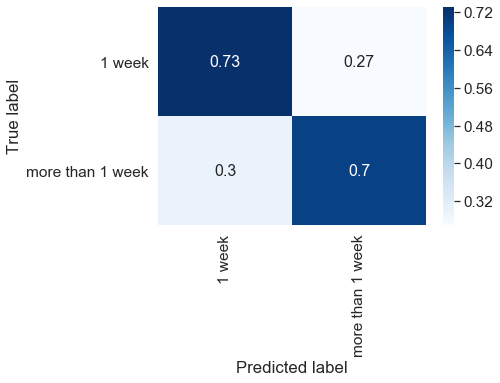

In [8]:
#create label names
label_names = []
label_names.append('1 week')
[label_names.append(str(c) + ' weeks') for c in range(2,cfg.label['num_classes'])]
if cfg.label['num_classes']==2:
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' week')
else:       
    label_names.append('more than '+ str(cfg.label['num_classes']-1)+ ' weeks')


cf = np.around(np.divide(conf_matrix, cfg.validation['splits']),2)

#store confusion_matrix
with open(timestamp_path + '/confusion_matrix.pkl', 'wb') as handle:
       pickle.dump(cf, handle, protocol=pickle.HIGHEST_PROTOCOL)

#print and store image of confusion matrix
df_cm = pd.DataFrame(cf, label_names, label_names)
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}, cmap=plt.cm.Blues) # font size
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.savefig(timestamp_path+'/confusion_matrix.pdf', bbox_inches='tight')
plt.show()

In [16]:
val_loss = hist[0]['val_loss']
val_acc = hist[0]['val_accuracy']
loss = hist[0]['loss']
acc = hist[0]['accuracy']

hist_en = iter(hist)
next(hist_en)
for _,i in enumerate(hist_en):
    val_loss = [g+h for g,h in zip(i['val_loss'], val_loss)]
    val_acc = [g+h for g,h in zip(i['val_accuracy'], val_acc)]
    loss = [g+h for g,h in zip(i['loss'], loss)]
    acc = [g+h for g,h in zip(i['accuracy'], acc)]

val_loss = [g/cfg.validation['splits'] for g in val_loss]
val_acc = [g/cfg.validation['splits'] for g in val_acc]
loss = [g/cfg.validation['splits'] for g in loss]
acc = [g/cfg.validation['splits'] for g in acc]

hist_dict = {'val_loss': val_loss, 'val_accuracy': val_acc, 'loss': loss, 'accuracy': acc}

#store report
with open(timestamp_path + '/history.pkl', 'wb') as handle:
        pickle.dump(hist_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

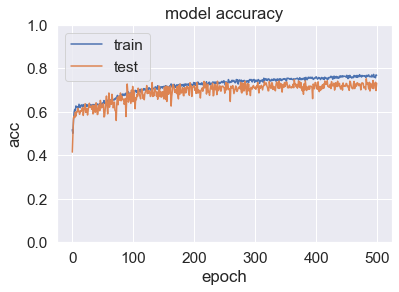

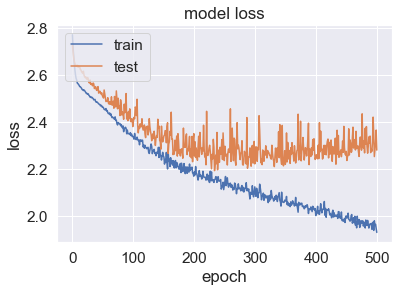

In [17]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# summarize history for accuracy
plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0,1])
plt.savefig(timestamp_path+'/model_accuracy.pdf', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
#plt.ylim([0, 1])
plt.savefig(timestamp_path+'/model_loss.pdf', bbox_inches='tight')
plt.savefig('./model_loss.pdf', bbox_inches='tight')
plt.show()

In [ ]:
m = 0
acc = hist[m]['acc']
val_acc = hist[m]['val_acc']
loss = hist[m]['loss']
val_loss = hist[m]['val_loss']

In [ ]:


plt.plot(acc)
plt.plot(val_acc)
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
plt.ylim([0,1])
#plt.savefig(timestamp_path+'/model_accuracy.pdf', bbox_inches='tight')
plt.show()
# summarize history for loss
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.xticks(range(0, cfg.epochs))
#plt.ylim([0, 1])
#plt.savefig(timestamp_path+'/model_loss.pdf', bbox_inches='tight')
#plt.savefig('./model_loss.pdf', bbox_inches='tight')
plt.show()

In [19]:
features

NameError: name 'features' is not defined